In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.examples.tutorials.mnist import input_data

In [50]:
#data
mnist = input_data.read_data_sets("../MNIST-data", one_hot=False)
x_, y_ = mnist.train.next_batch(60000)
Y = []
X = []
for e in range(60000):
    if y_[e]<=1:
        Y.append(y_[e])
        X.append(x_[e])
X = np.asarray(X)
Y = np.asarray(Y)
        
x_test,y_test = mnist.test.next_batch(10000)
test_Y = []
test_X = []
for e in range(10000):
    if y_test[e]<=1:
        test_Y.append(y_test[e])
        test_X.append(x_test[e])
test_X = np.asarray(test_X)
test_Y = np.asarray(test_Y)

Extracting ../MNIST-data\train-images-idx3-ubyte.gz
Extracting ../MNIST-data\train-labels-idx1-ubyte.gz
Extracting ../MNIST-data\t10k-images-idx3-ubyte.gz
Extracting ../MNIST-data\t10k-labels-idx1-ubyte.gz
(12674, 784)
(2115, 784)


In [51]:
def pixel_dist(p,t):
    return (np.sqrt((np.square(np.subtract(p,t))).sum()))/28

def plot(samples,indices):
    fig = plt.figure(figsize=(2, 2))
    gs = gridspec.GridSpec(2,2)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.title(str([indices[i]]))
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

def accuracy(labels):
    incorrect = []
    incorrect_Y = []
    acc = 0
    for t,r in enumerate(labels):
        if r==test_Y[t]:
            acc = acc+1
        else:
            incorrect.append(test_X[t])
            incorrect_Y.append(test_Y[t])
            
    return incorrect, incorrect_Y,acc/len(labels)

In [52]:
#KNN has no training
K = 5
#metric = average

labels = []
px_d = np.ones(len(X))
for k,e in enumerate(test_X):
    if k%100==0:
        print("Testing on ",k,"sample")
    #distance with each point in train set
    for j in range(len(X)):
        px_d[j] = pixel_dist(e,X[j])
    px_ds = np.argsort(px_d)
    count1 = 0
    for i in range(K):
        count1 = count1+Y[px_ds[i]]
    if count1>=(K-count1):
        labels.append(1)
    else:
        labels.append(0)

labels = np.asarray(labels)

Testing on  0 th sample
Testing on  100 th sample
Testing on  200 th sample
Testing on  300 th sample
Testing on  400 th sample
Testing on  500 th sample
Testing on  600 th sample
Testing on  700 th sample
Testing on  800 th sample
Testing on  900 th sample
Testing on  1000 th sample
Testing on  1100 th sample
Testing on  1200 th sample
Testing on  1300 th sample
Testing on  1400 th sample
Testing on  1500 th sample
Testing on  1600 th sample
Testing on  1700 th sample
Testing on  1800 th sample
Testing on  1900 th sample
Testing on  2000 th sample
Testing on  2100 th sample


In [53]:
incorrect_m,incorrect_my,acc_m = accuracy(labels)
print("My KNN accuracy =",acc_m)

My KNN accuracy = 0.9990543735224586


In [54]:
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X, Y)
sk_labels = neigh.predict(test_X)

In [55]:
incorrect_s,incorrect_sy,acc_s = accuracy(sk_labels)
print("Sklearn KNN accuracy =",acc_s)

Sklearn KNN accuracy = 0.9990543735224586


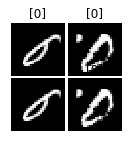

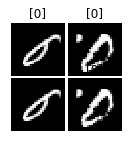

In [56]:
#show incorrect ones
incorrect = [incorrect_m[0],incorrect_m[1],incorrect_s[0],incorrect_s[1]]
incorrect_Y = [incorrect_my[0],incorrect_my[1],incorrect_sy[0],incorrect_sy[1]]
plot(incorrect,incorrect_Y)